# Exploratory Data Analysis

The purpose of this notebook is for an exploratory data analysis on the CSVs that we created previously (as a result of our Initial Data Exploration).

For this, we'll create some different charts and make calculations with the available data, looking for potential changes and/or insights that can be uncovered in the process.

Then, if any modifications were done to the CSVs, we'll update them and save it in the respective folder, so we can finally create our Dashboard using Excel.

## Table of Contents

- [Initial Configuration](#initial-configuration)

### Initial Configuration

Base imports for this notebook to work. We're also configuring some of those modules, to ensure that the code runs smoothly and the visualization is clean.

In [16]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Ensuring the data loading script directory is in the system path
sys.path.insert(0, os.path.abspath('..'))

import data_loading

# Set up logging
data_loading.setup_logging()

# Loading data
champions_stats, champions_stats_s1_to_s3, champions_stats_s4_to_s9, champions_stats_s10_above, matchs_stats, players_stats, players_stats_s1_to_s3, players_stats_s4_to_s9, players_stats_s10_above = data_loading.load_clean_data()

# Configuring pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Sets float values with two decimals
pd.options.mode.copy_on_write = True

# Matplotlib configuration
%matplotlib inline

2024-09-29 10:43:08,884 - INFO - champions_stats loaded succesfully.
2024-09-29 10:43:08,885 - INFO - champions_stats_s1_to_s3 loaded succesfully.
2024-09-29 10:43:08,887 - INFO - champions_stats_s4_to_s9 loaded succesfully.
2024-09-29 10:43:08,889 - INFO - champions_stats_s10_above loaded succesfully.
2024-09-29 10:43:08,895 - INFO - matchs_stats loaded succesfully.
2024-09-29 10:43:08,899 - INFO - players_stats loaded succesfully.
2024-09-29 10:43:08,900 - INFO - players_stats_s1_to_s3 loaded succesfully.
2024-09-29 10:43:08,902 - INFO - players_stats_s4_to_s9 loaded succesfully.
2024-09-29 10:43:08,903 - INFO - players_stats_s10_above loaded succesfully.


## Analytical Inquiries

### For Champion Stats

- **1. Champion Popularity:** Which champions were picked the most across different seasons?
- **2. Win Rate:** Which champions had the highest win rate in the dataset?
- **3. Champion Ban Rate:** Which champions were banned the most and how did their ban rate change across seasons?
- **4. Champion KDA:** Which champions had the highest KDA ratio across all seasons?
- **5. Damage Output:** Which champions had the highest average damage per season?

### For Match Stats

- **1. Objective Control:** Which teams had the highest Dragon and Baron control in their matches?
- **2. Early Game Advantage:** How does the team that secured the first tower correlate with overall match victory rates?
- **3. Gold Lead Impact:** What was the average gold lead at 15 minutes for winning versus losing teams?
- **4. Kill Participation:** How does kill participation of both teams relate to their success in a match?
- **5. Game Duration vs. Outcome:** What is the relationship between match duration and match outcome (victory or defeat)?
- **6. First Blood Impact:** How often did the team that secured First Blood go on to win the match?
- **7. Vision Control:** Which teams had the best vision score across different seasons and how did it impact match outcomes?
- **8. Item Builds:** How do specific item builds (like starting items) correlate with match victory?
- **9. Turret Advantage:** What is the average number of turrets taken by winning teams vs. losing teams?
- **10. Comeback Potential:** How often did a team come back from a significant gold deficit to win the match?

### For Player Stats

- **1. Player Performance by Role:** Which players had the highest kill/death/assist (KDA) ratios by role (top, jungle, mid, etc.) across all seasons?
- **2. Player Consistency:** Who were the most consistent players in terms of KDA over multiple seasons?
- **3. Impact of Supports:** How does the performance of support players (in terms of vision score, assists) correlate with the success of their teams?
- **4. Player Champion Pool:** Which players had the widest and most successful champion pools?
- **5. Kills vs. Deaths:** Which players have the highest kill-to-death ratio across all seasons?
- **6. Player Gold Efficiency:** Which players were able to generate the most gold per minute, and how does it reflect their overall impact on the game?
- **7. Aggressive Playstyles:** Which players had the highest First Blood participation and what impact did it have on match outcomes?
- **8. Farm Efficiency:** Which players had the highest CS (creep score) per minute, and how did that impact their overall performance in games?
- **9. Clutch Factor:** Which players had the most kills in late-game situations (after 30 minutes), contributing to their team’s victories?
- **10. Role Switch Impact:** How did players who switched roles between seasons perform compared to their prior role?

## Champion Stats

**1. Champion Popularity:** Which champions were picked the most across different seasons?

In [18]:
def sep_champion_stats_by_season(season: int) -> pd.DataFrame:
    return champions_stats[champions_stats['season'] == season].sort_values(by='played_games', ascending=False)

target_list = ['champion', 'played_games']

champions_stats_s1 = sep_champion_stats_by_season(1)[target_list]
champions_stats_s2 = sep_champion_stats_by_season(2)[target_list]
champions_stats_s3 = sep_champion_stats_by_season(3)[target_list]
champions_stats_s4 = sep_champion_stats_by_season(4)[target_list]
champions_stats_s5 = sep_champion_stats_by_season(5)[target_list]
champions_stats_s6 = sep_champion_stats_by_season(6)[target_list]
champions_stats_s7 = sep_champion_stats_by_season(7)[target_list]
champions_stats_s8 = sep_champion_stats_by_season(8)[target_list]
champions_stats_s9 = sep_champion_stats_by_season(9)[target_list]
champions_stats_s10 = sep_champion_stats_by_season(10)[target_list]
champions_stats_s11 = sep_champion_stats_by_season(11)[target_list]
champions_stats_s12 = sep_champion_stats_by_season(12)[target_list]

In [19]:
champions_stats_s1 = champions_stats_s1.groupby('champion', as_index=False)['played_games'].sum().sort_values(by='played_games', ascending=False)
champions_stats_s2 = champions_stats_s2.groupby('champion', as_index=False)['played_games'].sum().sort_values(by='played_games', ascending=False)
champions_stats_s3 = champions_stats_s3.groupby('champion', as_index=False)['played_games'].sum().sort_values(by='played_games', ascending=False)
champions_stats_s4 = champions_stats_s4.groupby('champion', as_index=False)['played_games'].sum().sort_values(by='played_games', ascending=False)
champions_stats_s5 = champions_stats_s5.groupby('champion', as_index=False)['played_games'].sum().sort_values(by='played_games', ascending=False)
champions_stats_s6 = champions_stats_s6.groupby('champion', as_index=False)['played_games'].sum().sort_values(by='played_games', ascending=False)
champions_stats_s7 = champions_stats_s7.groupby('champion', as_index=False)['played_games'].sum().sort_values(by='played_games', ascending=False)
champions_stats_s8 = champions_stats_s8.groupby('champion', as_index=False)['played_games'].sum().sort_values(by='played_games', ascending=False)
champions_stats_s9 = champions_stats_s9.groupby('champion', as_index=False)['played_games'].sum().sort_values(by='played_games', ascending=False)
champions_stats_s10 = champions_stats_s10.groupby('champion', as_index=False)['played_games'].sum().sort_values(by='played_games', ascending=False)
champions_stats_s11 = champions_stats_s11.groupby('champion', as_index=False)['played_games'].sum().sort_values(by='played_games', ascending=False)
champions_stats_s12 = champions_stats_s12.groupby('champion', as_index=False)['played_games'].sum().sort_values(by='played_games', ascending=False)

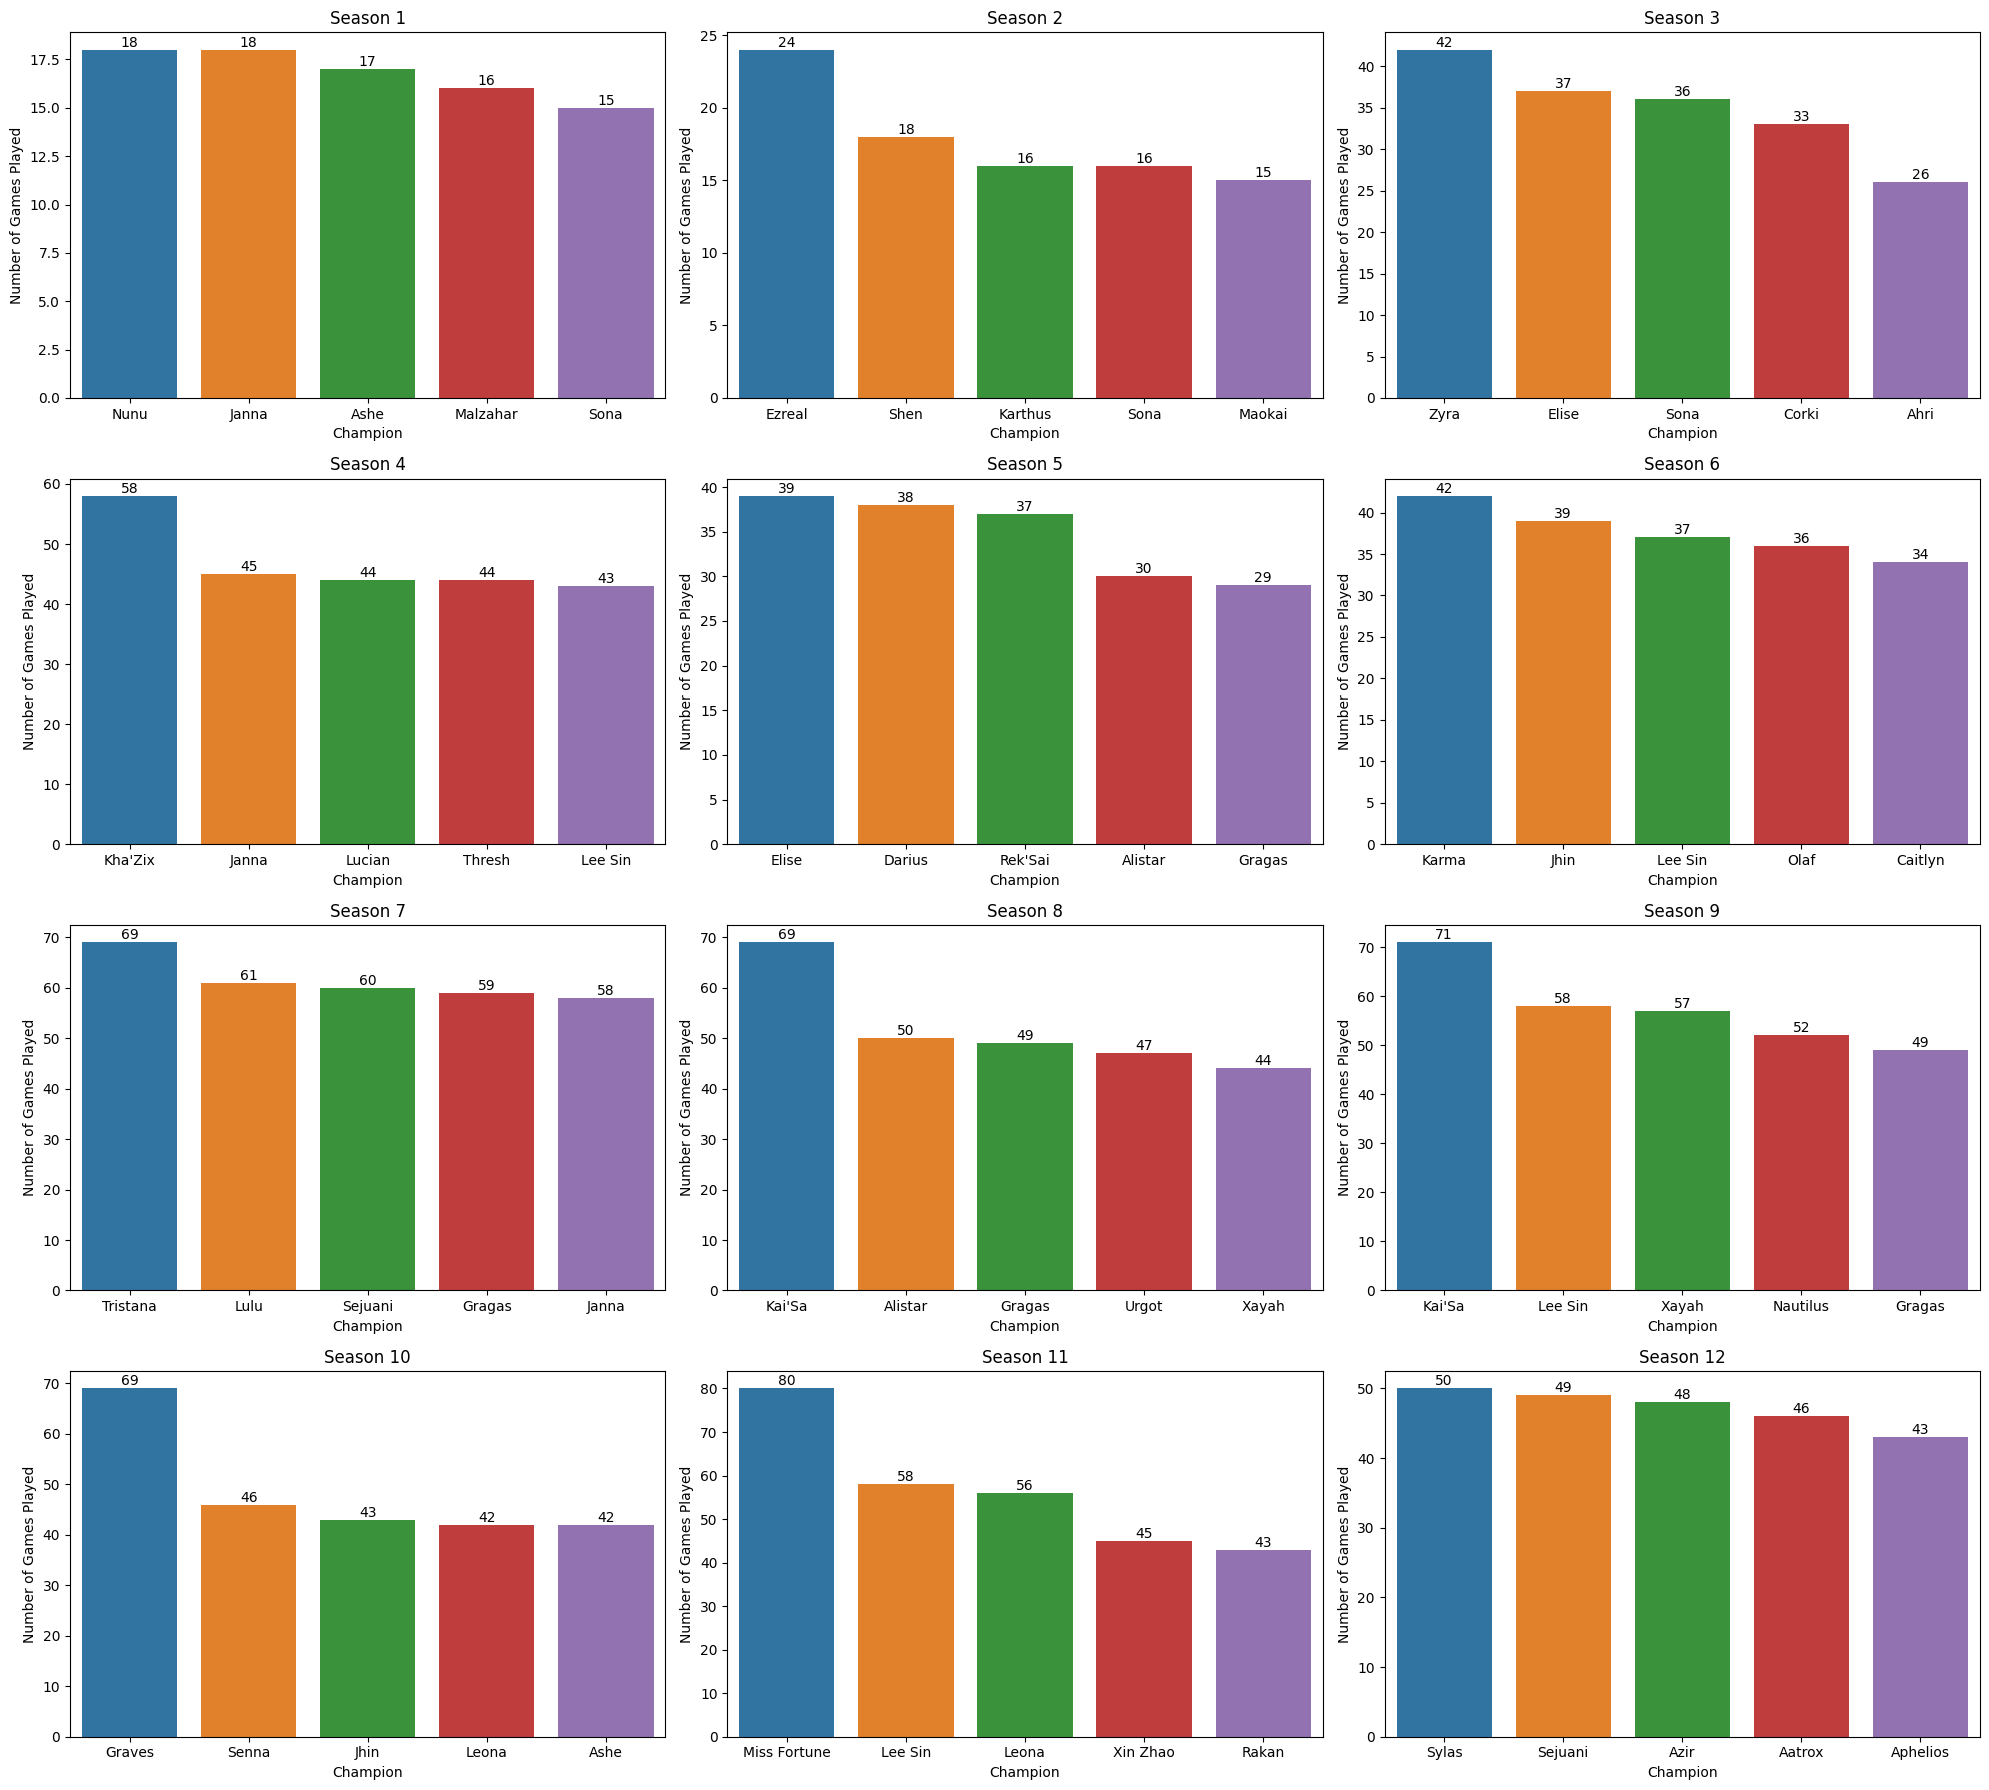

In [20]:
fig, axs = plt.subplots(4, 3, figsize=(20, 18))

datasets = [
    champions_stats_s1,
    champions_stats_s2,
    champions_stats_s3,
    champions_stats_s4,
    champions_stats_s5,
    champions_stats_s6,
    champions_stats_s7,
    champions_stats_s8,
    champions_stats_s9,
    champions_stats_s10,
    champions_stats_s11,
    champions_stats_s12
]

seasons = [
    'Season 1',
    'Season 2',
    'Season 3',
    'Season 4',
    'Season 5',
    'Season 6',
    'Season 7',
    'Season 8',
    'Season 9',
    'Season 10',
    'Season 11',
    'Season 12',
]

for i, ax in enumerate(axs.flat):
    sns.barplot(x='champion', y='played_games', data=datasets[i].head(), hue='champion', ax=ax, palette='tab10')

    # Setting the title to each barplot
    ax.set_title(seasons[i])

    # Setting different names for x and y-axis
    ax.set_xlabel('Champion')
    ax.set_ylabel('Number of Games Played')

    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f')

plt.tight_layout()

As an additional graph, let's check the most picked champion in all seasons!

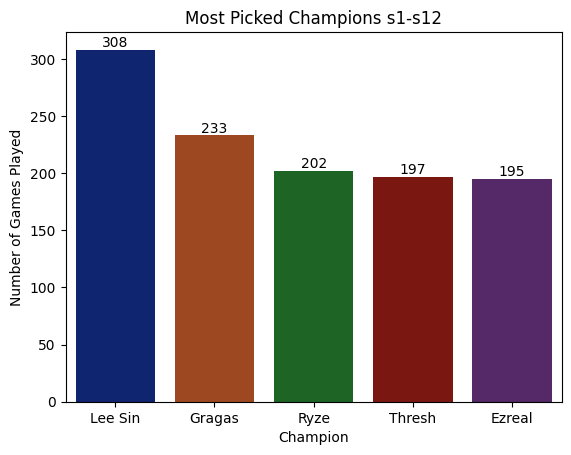

In [21]:
def create_barplot(dataset, title, x, x_title, y, y_title, fmt, palette = None):
    barplot = sns.barplot(x=x, y=y, data=dataset, hue=x, palette=palette)

    barplot.set_title(title)
    barplot.set_xlabel(x_title)
    barplot.set_ylabel(y_title)

    for container in barplot.containers:
        barplot.bar_label(container, fmt=fmt)

    return barplot


most_picked_champions = champions_stats.groupby('champion', as_index=False)['played_games'].sum().sort_values(by='played_games', ascending=False).head()

most_picked_barplot = create_barplot(
    dataset = most_picked_champions,
    title = 'Most Picked Champions s1-s12',
    x = 'champion',
    x_title = 'Champion',
    y = 'played_games',
    y_title = 'Number of Games Played',
    fmt='%.0f',
    palette='dark'
)

plt.show()

**2. Win Rate:** Which champions had the highest win rate in the dataset?

Total number of games played on Worlds, from s1 to s12: **1096**.

1096 / 12 = 91.333...

So let's check only champions with 91+ games (the average).

In [22]:
# First, we have to sum the winrates of every champion, weighing in the total number of times that champion was played.

champions_stats['total_win_rate'] = champions_stats['win_rate'] * champions_stats['played_games']

weighted_wr = champions_stats.groupby('champion').agg(
    total_win_rate = ('total_win_rate', 'sum'),
    total_games = ('played_games', 'sum')
)

weighted_wr['total_win_rate'] = weighted_wr['total_win_rate'] / weighted_wr['total_games']

# Then, we filter out the champions with 90 games or less.

highest_wr_champions = weighted_wr[weighted_wr['total_games'] >= 91].sort_values(by='total_win_rate', ascending=False).head()

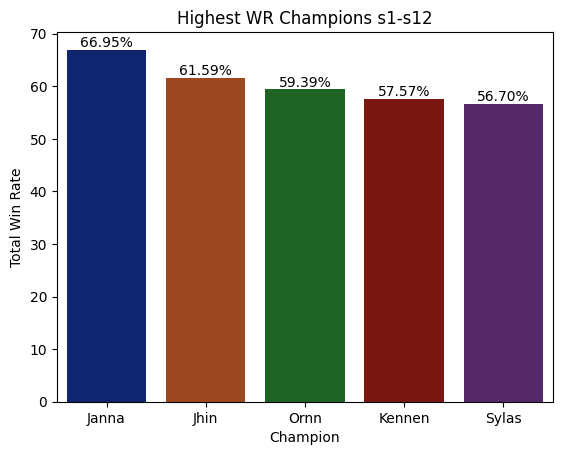

In [23]:
highest_wr_barplot = create_barplot(
    dataset=highest_wr_champions,
    title='Highest WR Champions s1-s12',
    x='champion',
    x_title='Champion',
    y='total_win_rate',
    y_title='Total Win Rate',
    fmt='%.2f%%',
    palette='dark'
)

plt.show()

Let's also check the highest WR champions each season.

In [24]:
# Creating to get the weighted WR in each dataset.

def get_weighted_wr(dataset, games_limit):
    dataset['total_win_rate'] = dataset['win_rate'] * dataset['played_games']

    weighted_wr = dataset.groupby('champion').agg(
        total_win_rate = ('total_win_rate', 'sum'),
        total_games = ('played_games', 'sum')
    )

    weighted_wr['total_win_rate'] = weighted_wr['total_win_rate'] / weighted_wr['total_games']

    highest_wr_champions = weighted_wr[weighted_wr['total_games'] >= games_limit].sort_values(by='total_win_rate', ascending=False).head()

    return highest_wr_champions

For the sake of this analysis, we'll only check champions that were played, at least, a third of the total matches in that season's Worlds.

- **S1:** 28 matches total. 28 / 3 = 9.333... = **9**
- **S2:** 31 matches total. 31 / 3 = 10.333... = **10**
- **S3:** 63 games total. 63 / 3 = **21**
- **S4:** 79 games total. 79 / 3 = 26.333... = **26**
- **S5:** 74 games total. 74 / 3 = 24.666... = **25**
- **S6:** 78 games total. 78 / 3 = **26**
- **S7:** 122 games total. 122 / 3 = 40.666... = **41**
- **S8:** 122 games total. 122 / 3 = 40.666... = **41**
- **S9:** 120 games total. 120 / 3 = **40**
- **S10:** 120 games total. 120 / 3 = **40**
- **S11:** 125 games total. 125 / 3 = 41.666... = **42**
- **S12:** 131 games total. 131 / 3 = 43.666... = **44**

For s12, however, doing this will only return 4 champions. So, we'll divide the total by 4. 131 / 4 = 32.75 = **33**

In [44]:
S1_LIMIT = 9
S2_LIMIT = 10
S3_LIMIT = 21
S4_LIMIT = 26
S5_LIMIT = 25
S6_LIMIT = 26
S7_LIMIT = 41
S8_LIMIT = 41
S9_LIMIT = 40
S10_LIMIT = 40
S11_LIMIT = 42
S12_LIMIT = 33

In [45]:
# Let's separate the stats again for each season, but this time bringing in the win rate.

target_list = ['champion', 'played_games', 'win_rate']

champions_stats_s1 = sep_champion_stats_by_season(1)[target_list]
champions_stats_s2 = sep_champion_stats_by_season(2)[target_list]
champions_stats_s3 = sep_champion_stats_by_season(3)[target_list]
champions_stats_s4 = sep_champion_stats_by_season(4)[target_list]
champions_stats_s5 = sep_champion_stats_by_season(5)[target_list]
champions_stats_s6 = sep_champion_stats_by_season(6)[target_list]
champions_stats_s7 = sep_champion_stats_by_season(7)[target_list]
champions_stats_s8 = sep_champion_stats_by_season(8)[target_list]
champions_stats_s9 = sep_champion_stats_by_season(9)[target_list]
champions_stats_s10 = sep_champion_stats_by_season(10)[target_list]
champions_stats_s11 = sep_champion_stats_by_season(11)[target_list]
champions_stats_s12 = sep_champion_stats_by_season(12)[target_list]

In [46]:
s1_highest_wr = get_weighted_wr(champions_stats_s1, S1_LIMIT)
s2_highest_wr = get_weighted_wr(champions_stats_s2, S2_LIMIT)
s3_highest_wr = get_weighted_wr(champions_stats_s3, S3_LIMIT)
s4_highest_wr = get_weighted_wr(champions_stats_s4, S4_LIMIT)
s5_highest_wr = get_weighted_wr(champions_stats_s5, S5_LIMIT)
s6_highest_wr = get_weighted_wr(champions_stats_s6, S6_LIMIT)
s7_highest_wr = get_weighted_wr(champions_stats_s7, S7_LIMIT)
s8_highest_wr = get_weighted_wr(champions_stats_s8, S8_LIMIT)
s9_highest_wr = get_weighted_wr(champions_stats_s9, S9_LIMIT)
s10_highest_wr = get_weighted_wr(champions_stats_s10, S10_LIMIT)
s11_highest_wr = get_weighted_wr(champions_stats_s11, S11_LIMIT)
s12_highest_wr = get_weighted_wr(champions_stats_s12, S12_LIMIT)

In [53]:
s1_highest_wr

,total_win_rate,total_games
champion,,
Ashe,76.50,17
Nunu,66.70,18
Jarvan IV,61.50,13
Alistar,61.50,13
Sona,60.00,15


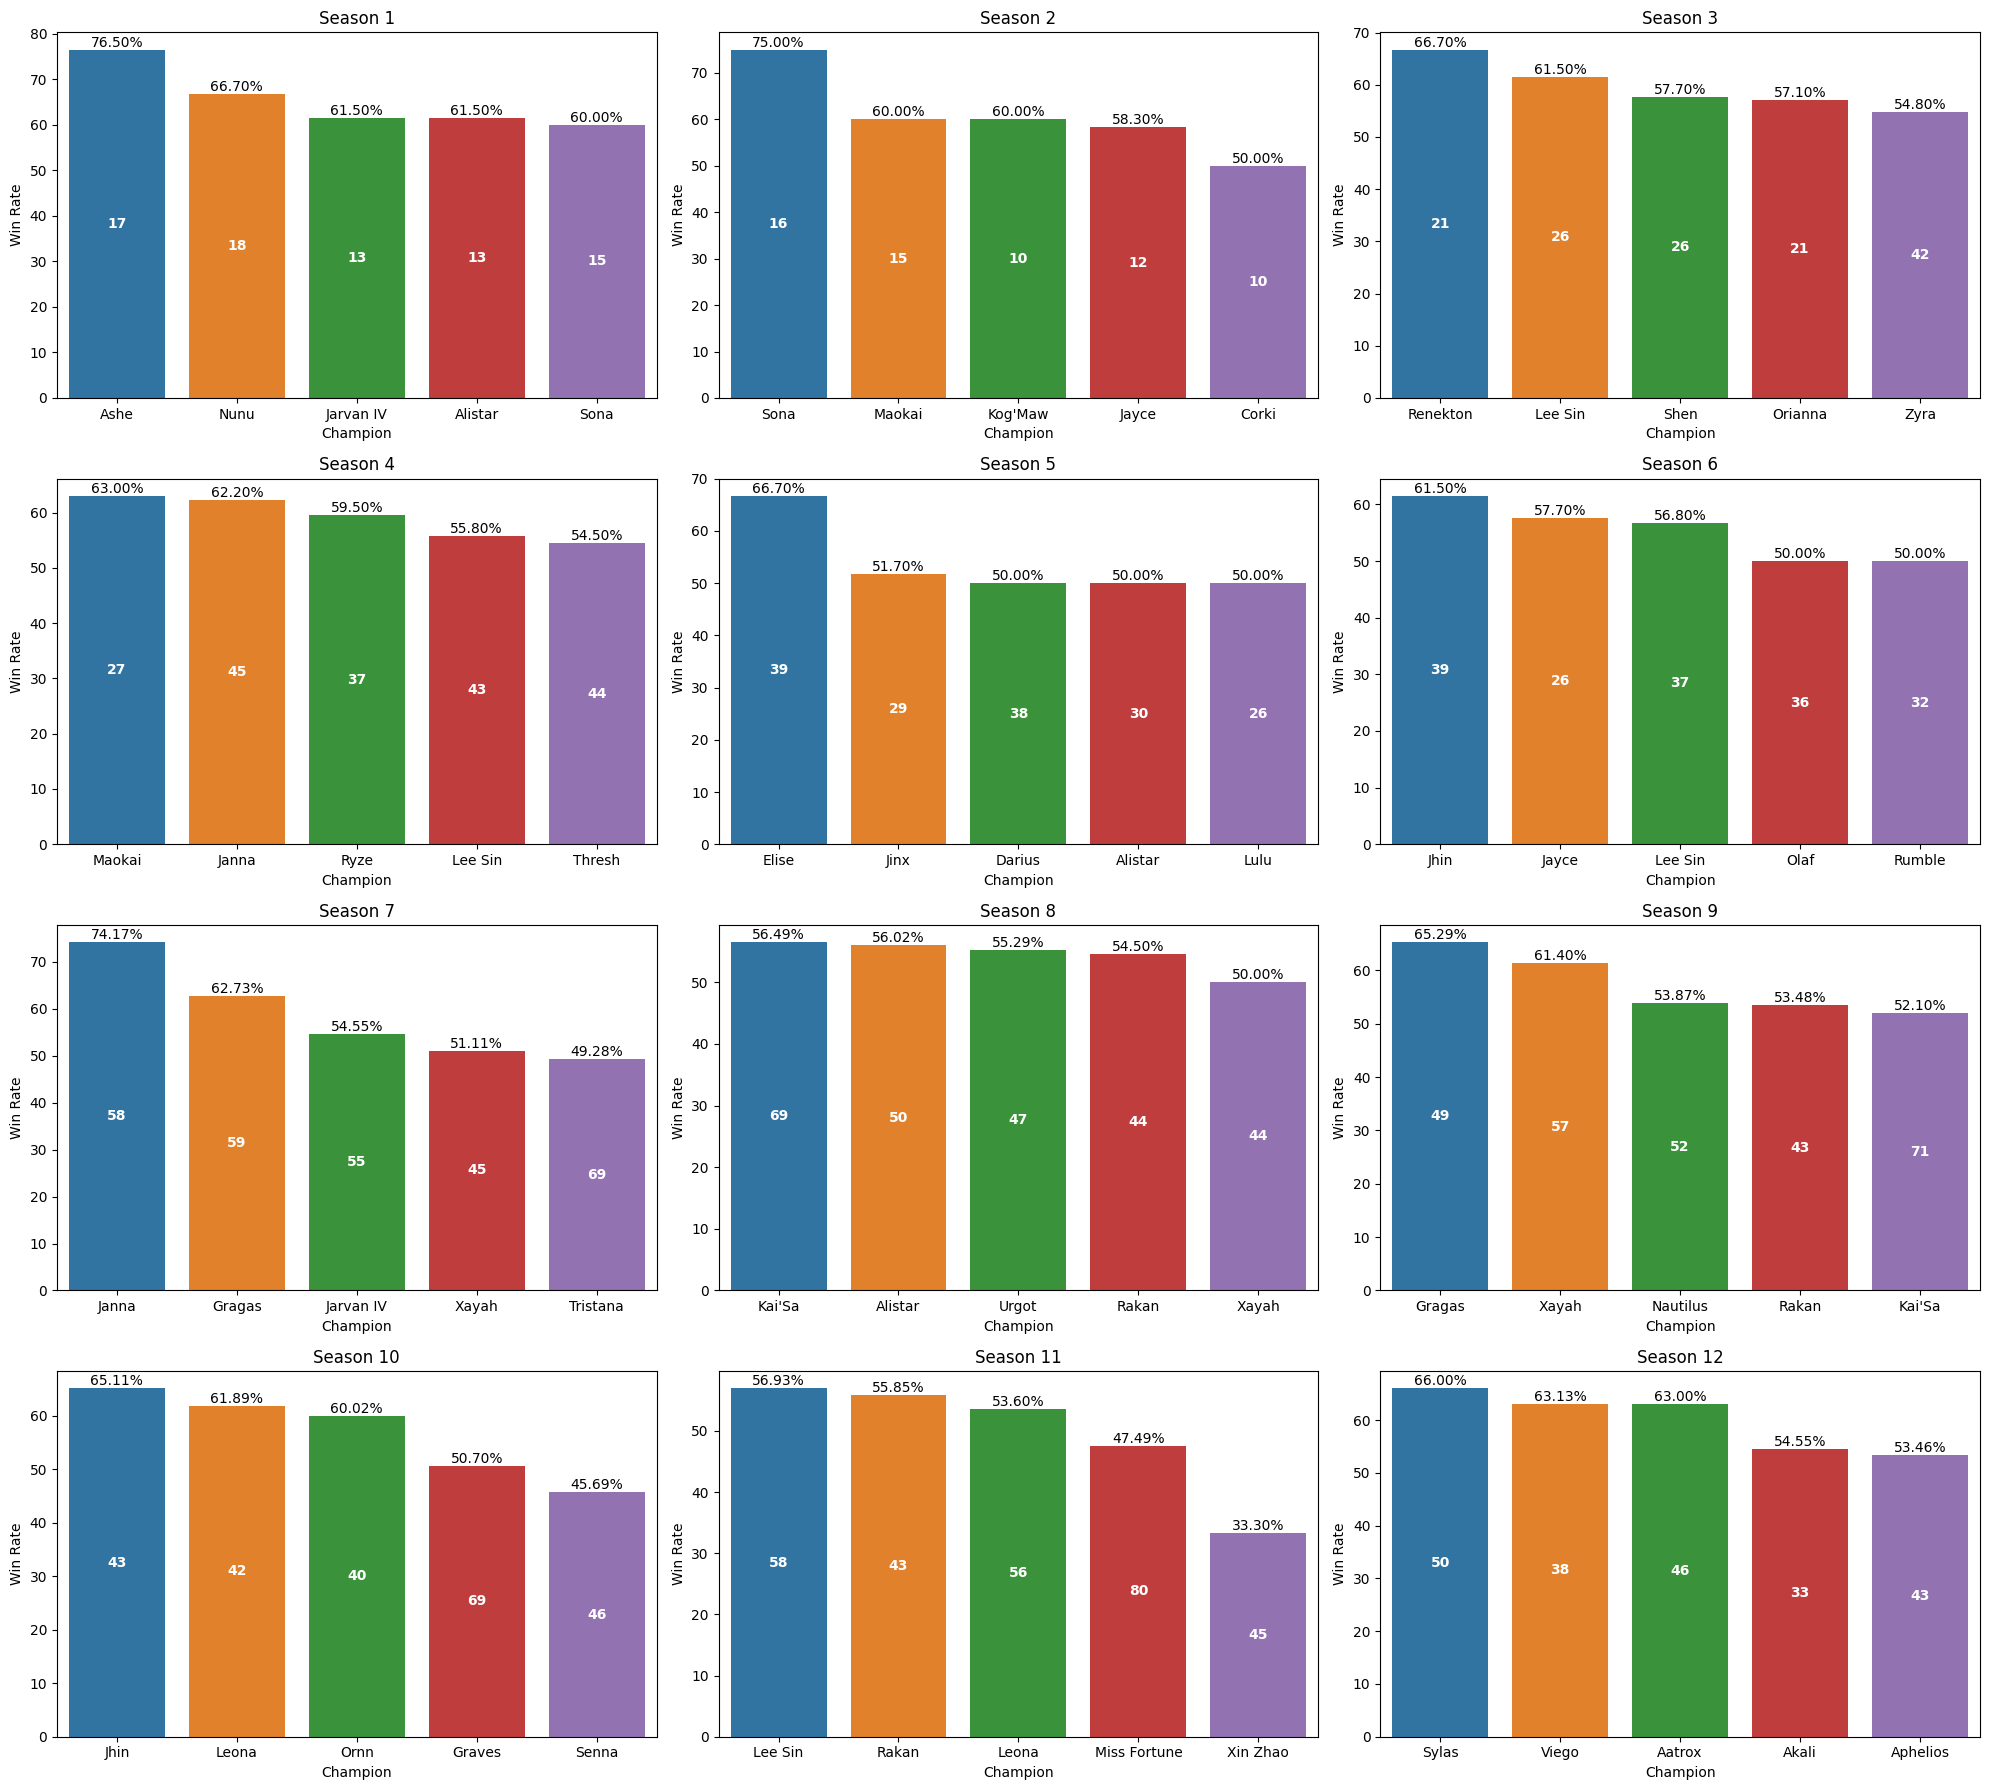

In [57]:
fig, axs = plt.subplots(4, 3, figsize=(20, 18))

datasets = [
    s1_highest_wr,
    s2_highest_wr,
    s3_highest_wr,
    s4_highest_wr,
    s5_highest_wr,
    s6_highest_wr,
    s7_highest_wr,
    s8_highest_wr,
    s9_highest_wr,
    s10_highest_wr,
    s11_highest_wr,
    s12_highest_wr
]

seasons = [
    'Season 1',
    'Season 2',
    'Season 3',
    'Season 4',
    'Season 5',
    'Season 6',
    'Season 7',
    'Season 8',
    'Season 9',
    'Season 10',
    'Season 11',
    'Season 12',
]

for i, ax in enumerate(axs.flat):
    sns.barplot(x='champion', y='total_win_rate', data=datasets[i].head(), hue='champion', ax=ax, palette='tab10')

    ax.set_title(seasons[i])
    ax.set_xlabel('Champion')
    ax.set_ylabel('Win Rate')

    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f%%')

    # Adding number of played games inside each bar.
    for idx, p in enumerate(ax.patches):
        played_games = int(datasets[i].iloc[idx]['total_games'])
        ax.text(
            p.get_x() + p.get_width() / 2,
            p.get_height() / 2,
            f'{played_games}',
            ha='center', va='center', color='white', fontsize=10, weight='bold'
        )

plt.tight_layout()

# THIS NOTEBOOK IS STILL A WORK IN PROGRESS!